In [10]:
%matplotlib inline
import GEOparse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import explained_variance_score, plot_roc_curve
import statsmodels.api as sm
from scipy.stats import ttest_ind
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklego.linear_model import LowessRegression

### Reading in from external source

In [11]:
geo = "GSE93300"
data = GEOparse.get_GEO(geo=geo, destdir="../Dataset/Qu2017", silent=True)
#table = pd.read_csv("../Dataset/Fehlman2020/expression_matrix.csv", sep="\t")
#table = pd.read_csv("../Dataset/Wozniak2015/GSE64591_non-normalized.txt", sep="\t", header=5)

In [12]:
table = pd.concat((val.table.iloc[:,1:] for val in data.gsms.values()), axis=1).transpose()
mirnas = list(data.gsms.values())[0].table.iloc[:,0]

In [13]:
table

,0,1,2,3,4,5,6,7,8,9,...,2539,2540,2541,2542,2543,2544,2545,2546,2547,2548
VALUE,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,...,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994
VALUE,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,...,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311
VALUE,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,...,-6.005052,-6.005052,-6.005052,-1.093576,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052
VALUE,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,...,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978
VALUE,-7.405798,-7.405798,0.561665,-7.405798,-7.405798,-2.051536,-7.405798,-7.405798,-7.405798,-7.405798,...,-7.405798,-7.405798,-7.405798,-7.405798,-7.405798,-7.405798,-7.405798,-7.405798,-7.405798,-7.405798
VALUE,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,...,-6.887403,-6.887403,-1.452145,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403
VALUE,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,...,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704
VALUE,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,...,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757
VALUE,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,...,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224
VALUE,-8.948247,-8.948247,-2.495316,-8.948247,-8.948247,-8.948247,-8.948247,-8.948247,-8.948247,-8.948247,...,-8.948247,-8.948247,-3.548126,-8.948247,-8.948247,-8.948247,-8.948247,-8.948247,-8.948247,-8.948247


### Seperate case and controls

In [14]:
list(data.gsms.values())[1].metadata

{'title': ['Patient 2 150690A_TKI-19-2'],
 'geo_accession': ['GSM2450564'],
 'status': ['Public on Jan 10 2017'],
 'submission_date': ['Jan 09 2017'],
 'last_update_date': ['Jan 10 2017'],
 'type': ['RNA'],
 'channel_count': ['1'],
 'source_name_ch1': ['primary lung cancer'],
 'organism_ch1': ['Homo sapiens'],
 'taxid_ch1': ['9606'],
 'characteristics_ch1': ['plasma: primary lung cancer',
  'age: 43 years',
  'gender: Female',
  'smoking history: No',
  'histology: Adenocarcinoma',
  'clinical stage: IV',
  'egfr mutational status: 19DEL'],
 'treatment_protocol_ch1': ['All the participants enrolled had 7ml peripheral venous blood samples collected in the fasting state at morning. Plasma was separated within 30 minutes since the sample collection with the centrifugation at 4,500Ã—g for 10 minutes at 4 â„ƒ and then stored immediately at -80â„ƒ for further measurements.'],
 'growth_protocol_ch1': ['Not applicable'],
 'molecule_ch1': ['total RNA'],
 'extract_protocol_ch1': ['Total RNA cont

In [15]:
set([k.metadata["characteristics_ch1"][0] for k in list(data.gsms.values())])

{'plasma: healthy donor', 'plasma: primary lung cancer'}

In [16]:
sick = np.array(["cancer" in k.metadata["characteristics_ch1"][0] for k in list(data.gsms.values())])
controls = 1 - sick

In [17]:
sum(controls)

4

### Drop NAN

In [18]:
table.isna().sum().sum()

0

In [19]:
table = table.dropna(1)

C:\Users\olefr\AppData\Local\Temp/ipykernel_2832/1927661217.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  table = table.dropna(1)


### T-test

In [20]:
X = table

In [21]:
X

,0,1,2,3,4,5,6,7,8,9,...,2539,2540,2541,2542,2543,2544,2545,2546,2547,2548
VALUE,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,...,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994
VALUE,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,...,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311
VALUE,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,...,-6.005052,-6.005052,-6.005052,-1.093576,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052
VALUE,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,...,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978
VALUE,-7.405798,-7.405798,0.561665,-7.405798,-7.405798,-2.051536,-7.405798,-7.405798,-7.405798,-7.405798,...,-7.405798,-7.405798,-7.405798,-7.405798,-7.405798,-7.405798,-7.405798,-7.405798,-7.405798,-7.405798
VALUE,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,...,-6.887403,-6.887403,-1.452145,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403
VALUE,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,...,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704
VALUE,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,...,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757
VALUE,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,...,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224
VALUE,-8.948247,-8.948247,-2.495316,-8.948247,-8.948247,-8.948247,-8.948247,-8.948247,-8.948247,-8.948247,...,-8.948247,-8.948247,-3.548126,-8.948247,-8.948247,-8.948247,-8.948247,-8.948247,-8.948247,-8.948247


In [22]:
X_healthy, X_cancer = X[controls == 1], X[sick == 1]

In [23]:
results = ttest_ind(X_healthy, X_cancer).pvalue

In [24]:
lowest, pvalues = np.argsort(results)[:5], np.sort(results)[:5]

In [25]:
mirnas.iloc[lowest], pvalues

(1366    A_25_P00010438
 725     A_25_P00013981
 1344    A_25_P00014844
 1586    A_25_P00014020
 1762    A_25_P00014832
 Name: ID_REF, dtype: object,
 array([1.46004280e-05, 3.98421396e-05, 8.41147629e-05, 1.19516628e-04,
        1.83403803e-04]))

### F-test

In [26]:
t3 = table

In [27]:
f, p = f_classif(t3, sick)

In [28]:
np.mean(p)

0.05717715037549747

### ANOVA

In [29]:
t3

,0,1,2,3,4,5,6,7,8,9,...,2539,2540,2541,2542,2543,2544,2545,2546,2547,2548
VALUE,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,...,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994,-6.055994
VALUE,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,...,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311,-6.953311
VALUE,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,...,-6.005052,-6.005052,-6.005052,-1.093576,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052,-6.005052
VALUE,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,...,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978,-5.188978
VALUE,-7.405798,-7.405798,0.561665,-7.405798,-7.405798,-2.051536,-7.405798,-7.405798,-7.405798,-7.405798,...,-7.405798,-7.405798,-7.405798,-7.405798,-7.405798,-7.405798,-7.405798,-7.405798,-7.405798,-7.405798
VALUE,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,...,-6.887403,-6.887403,-1.452145,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403,-6.887403
VALUE,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,...,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704,-4.498704
VALUE,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,...,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757,-6.467757
VALUE,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,...,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224,-4.934224
VALUE,-8.948247,-8.948247,-2.495316,-8.948247,-8.948247,-8.948247,-8.948247,-8.948247,-8.948247,-8.948247,...,-8.948247,-8.948247,-3.548126,-8.948247,-8.948247,-8.948247,-8.948247,-8.948247,-8.948247,-8.948247


In [30]:
X = np.array(sick).reshape(-1, 1)

In [31]:
linreg = LinearRegression()
linreg.fit(X, t3)

LinearRegression()

In [32]:
fitted = linreg.predict(X)
explained_variance_score(t3, fitted)

0.4717486956519398

### Mean-variance-plot

In [33]:
np.mean(table)

0      -6.703444
1      -6.703444
2      -5.040537
3      -6.703444
4      -6.703444
          ...   
2544   -6.703444
2545   -6.703444
2546   -6.703444
2547   -6.703444
2548   -6.703444
Length: 2549, dtype: float64

In [34]:
def get_means_and_variances(table):
    return np.mean(table), np.var(table, ddof=1)

In [35]:
def mean_variance_plot(table):
    means, variances = get_means_and_variances(table)
    plt.scatter(means, variances)
    plt.xlabel("mean")
    plt.ylabel("variance")
    plt.plot()

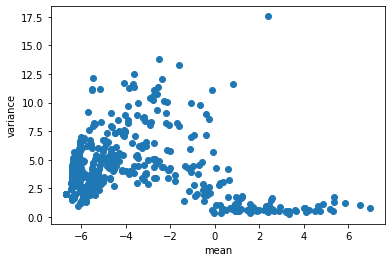

In [36]:
mean_variance_plot(table)

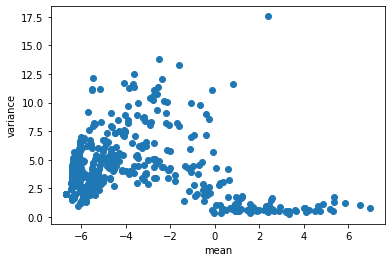

In [37]:
mean_variance_plot(table)

### Loess regression

In [38]:
lowess = LowessRegression(sigma=1, span=0.1)

In [39]:
means, variances = get_means_and_variances(table)
lowess.fit(means.to_numpy().reshape(-1,1), variances)

LowessRegression(span=0.1)

In [40]:
x_axis = np.linspace(-2, 14, 100)
y_axis = lowess.predict(x_axis.reshape(-1,1))

[]

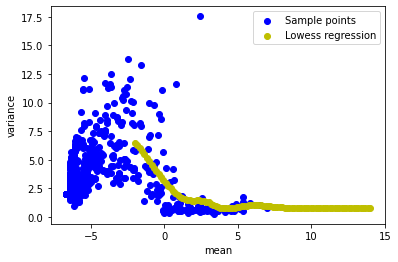

In [41]:
plt.scatter(means, variances, color="b")
plt.scatter(x_axis, y_axis, color="y")
plt.xlabel("mean")
plt.ylabel("variance")
plt.legend(["Sample points", "Lowess regression"])
plt.plot()

In [42]:
adj_var = lowess.predict(means.to_numpy().reshape(-1, 1))

In [43]:
table /= np.sqrt(adj_var)

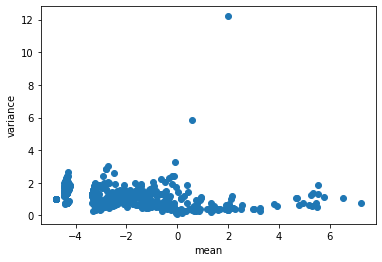

In [44]:
mean_variance_plot(table)

### Log transformation

In [45]:
log_table = table #np.log2(table)

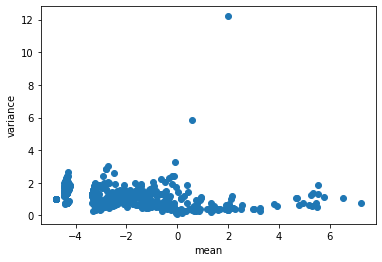

In [46]:
mean_variance_plot(log_table)

In [47]:
norm_log_table = log_table #- np.mean(log_table)

In [48]:
#norm_log_table /= np.sqrt(np.mean(np.var(norm_log_table, ddof=1)))

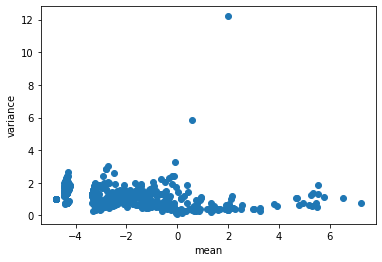

In [49]:
mean_variance_plot(norm_log_table)

### PCA

In [50]:
pca = decomposition.PCA(n_components=10)

In [51]:
pca.fit(norm_log_table)

PCA(n_components=10)

In [52]:
pca.explained_variance_ratio_

array([0.83589151, 0.0650706 , 0.02698589, 0.01704358, 0.01192106,
       0.01059864, 0.00772589, 0.00710814, 0.00523716, 0.00512864])

In [53]:
components = pca.transform(norm_log_table)

In [54]:
components.shape

(13, 10)

In [55]:
sum(controls)

4

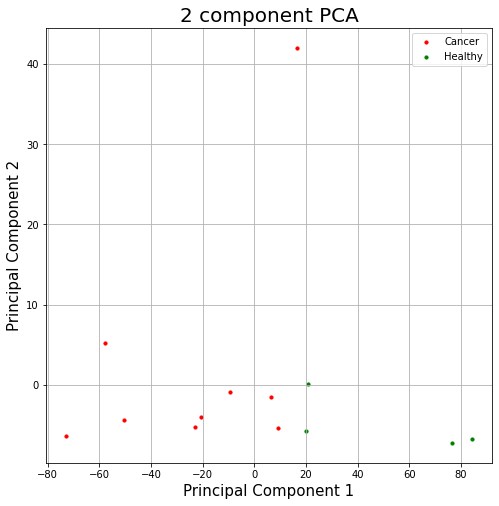

In [56]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components[controls == False, 0], components[controls == False, 1], c = 'r', s = 10)
ax.scatter(components[controls == True, 0], components[controls == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

In [57]:
components2 = components[components[:,0] < 20, :]
controls2 = controls[components[:,0] < 20]

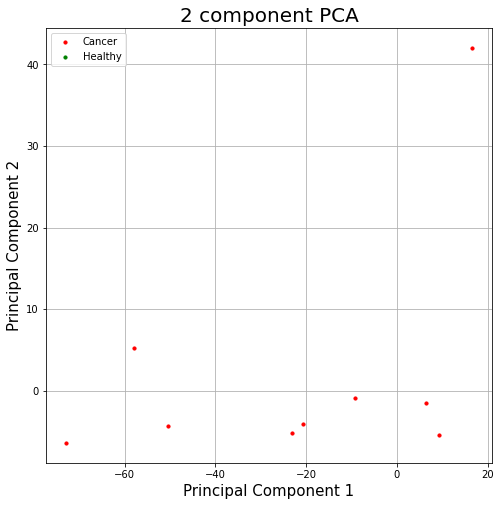

In [58]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components2[controls2 == False, 0], components2[controls2 == False, 1], c = 'r', s = 10)
ax.scatter(components2[controls2 == True, 0], components2[controls2 == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

### Linear regression adjustments

In [59]:
sex = np.array(["Female" in k.metadata["characteristics_ch1"][2] for k in list(data.gsms.values())])
age = np.array([float(k.metadata["characteristics_ch1"][1].split(" ")[1].replace("NA", "NaN")) for k in list(data.gsms.values())])

In [60]:
covars = pd.DataFrame(np.array([sex, age]).transpose(), columns=["sex", "age"])

In [61]:
covars = covars.fillna(covars.mean())

In [62]:
linreg = LinearRegression()
linreg.fit(covars, norm_log_table)

LinearRegression()

In [63]:
adj_norm_log_table = norm_log_table #- linreg.predict(covars)

# PCA

In [64]:
pca = decomposition.PCA(n_components=2)

In [65]:
pca.fit(adj_norm_log_table)

PCA(n_components=2)

In [66]:
components = pca.transform(adj_norm_log_table)

In [67]:
components

array([[-20.65755195,  -4.03665789],
       [  9.22916129,  -5.42675198],
       [-23.08406038,  -5.20948762],
       [-50.41760409,  -4.34641001],
       [ 16.5602388 ,  42.04416778],
       [  6.46491351,  -1.4742018 ],
       [-72.87370269,  -6.39950241],
       [ -9.3136526 ,  -0.82605494],
       [-57.93620584,   5.19860018],
       [ 76.47283138,  -7.25039614],
       [ 84.32347382,  -6.7034769 ],
       [ 21.00474484,   0.12153017],
       [ 20.22741392,  -5.69135843]])

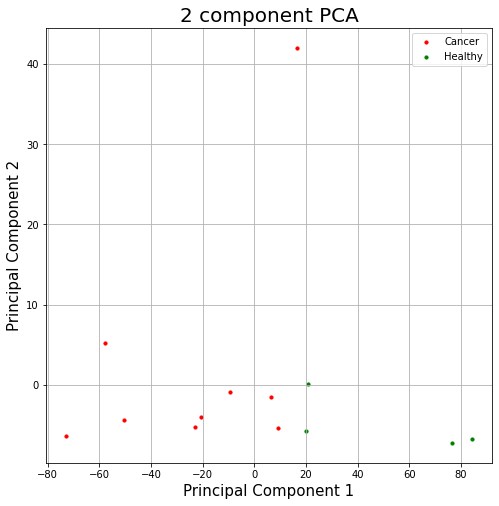

In [68]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Cancer', 'Healthy']
colors = ['r', 'g']
ax.scatter(components[controls == False, 0], components[controls == False, 1], c = 'r', s = 10)
ax.scatter(components[controls == True, 0], components[controls == True, 1], c = 'g', s = 10)
ax.legend(targets)
ax.grid()

### Logistic Regression

In [69]:
X_train, X_test, y_train, y_test = train_test_split(adj_norm_log_table, controls, test_size=0.33, random_state=42)

In [70]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\olefr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

C:\Users\olefr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


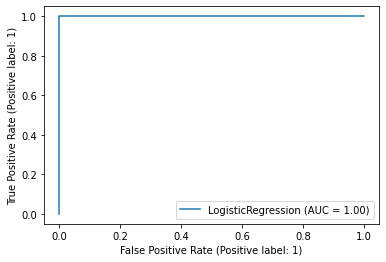

In [71]:
plot_roc_curve(model, X_test, y_test)

### XGBoost

In [72]:
model = XGBClassifier(use_label_encoder=False)
model.fit(X_train, y_train)

[20:17:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

C:\Users\olefr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


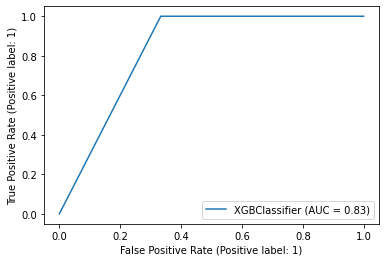

In [73]:
plot_roc_curve(model, X_test, y_test)

### Exporting data

In [74]:
lookup_table = data.gpls["GPL21576"].table

In [75]:
lookup_table = lookup_table.set_index("ID")
lookup_table.head()

,miRNA_ID,SPOT_ID,GENE_SYMBOL,GENE_NAME,ACCESSION_STRING,CHROMOSOMAL_LOCATION,SPOT_ID.1
ID,,,,,,,
(-)3xSLv1,NaN,--NegativeControl,NaN,NaN,NaN,NaN,NaN
A_25_P00010019,hsa-miR-329-3p,NaN,hsa-miR-329-3p,hsa-miR-329-3p,mir|hsa-miR-329-3p|mir|MIMAT0001629|mir|hsa-mi...,"chr14:101493173-101493192,chr14:101493490-1014...",NaN
A_25_P00010020,hsa-miR-329-3p,NaN,hsa-miR-329-3p,hsa-miR-329-3p,mir|hsa-miR-329-3p|mir|MIMAT0001629|mir|hsa-mi...,"chr14:101493174-101493192,chr14:101493491-1014...",NaN
A_25_P00010021,hsa-miR-655-3p,NaN,hsa-miR-655-3p,hsa-miR-655-3p,mir|hsa-miR-655-3p|mir|MIMAT0003331|mir|hsa-mi...,chr14:101515949-101515968,NaN
A_25_P00010023,hsa-miR-369-3p,NaN,hsa-miR-369-3p,hsa-miR-369-3p,mir|hsa-miR-369-3p|mir|MIMAT0000721,unmapped,NaN


In [76]:
access_ids = lookup_table.loc[mirnas]["ACCESSION_STRING"]

In [77]:
access_ids = [a.split("|")[-1] for a in access_ids]

In [78]:
access_ids[:10]

['MIMAT0014997',
 'MIMAT0010251',
 'MIMAT0019015',
 'MIMAT0027476',
 'MIMAT0002883',
 'MIMAT0018179',
 'MIMAT0002859',
 'MIMAT0028217',
 'MIMAT0030412',
 'MIMAT0027591']

In [79]:
from Scripts import converters

In [80]:
sequences = converters.mirbase_to_seq(access_ids)

Exception: No sequence found for access id: MIMAT0020299

In [ ]:
sequences[:10]

In [ ]:
adj_norm_log_table.columns = sequences
adj_norm_log_table["cancer"] = sick
adj_norm_log_table.head()

In [ ]:
adj_norm_log_table.to_csv("../TransformedData/Qu2017_raw.csv", index=False)